In [1]:
import pandas as pd
import datetime 
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_columns', 100)

# 1. Data Load

In [2]:
raw_df = pd.read_csv('loan.csv',encoding='utf-8')

In [3]:
raw_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# 2. Data Cleanup

- Checking nonempty columns in the file, as we can see there are many columns which dont contain any data. We have to first remove all those columns because they dont have any data, hence they cannot help in EDA as well.

In [5]:
raw_df.notnull().sum()

id                                39717
member_id                         39717
loan_amnt                         39717
funded_amnt                       39717
funded_amnt_inv                   39717
term                              39717
int_rate                          39717
installment                       39717
grade                             39717
sub_grade                         39717
emp_title                         37258
emp_length                        38642
home_ownership                    39717
annual_inc                        39717
verification_status               39717
issue_d                           39717
loan_status                       39717
pymnt_plan                        39717
url                               39717
desc                              26777
purpose                           39717
title                             39706
zip_code                          39717
addr_state                        39717
dti                               39717


### 2.1. Data Cleanup-Fixing Columns: Identifying & Dropping empty columns from dataset
- Used comprehension to get all empty columns from dataset. 
- Once get the empty_columns list, which actually contains the name of columns, is used to drop those columns from dataset
- After droping the columns when we get info of dataframe, we can see there are no columns with empty data
- But still there are some columns which needs the attenstion

In [6]:
# Comprehension is used to get the empty columns list
#empty_columns = [col for col in list(raw_df.columns) if raw_df[col].notnull().sum() == 0]

In [7]:
#df = raw_df.drop(columns=empty_columns)
df = raw_df.dropna(axis=1, how='all')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

### 2.2. Data Cleanup-Fixing Columns: Dropping columns with huge missing data
- After checking all the not available data in all columns we can see there are few columns which needs to be paid attention. Those columns are **next_pymnt_d**,**mths_since_last_record**,**mths_since_last_delinq**,**desc**. These columns have huge data missing. If we impute any data to them it will be exgerating the results. 
- We can see percentage data missining for all the above mentioned columns which huge and imputing values to them does not make sense.
- desc column is a description column and it has 12940 missing. Since this column does not help on EDA process, hence better to drop this column 

In [9]:
# Getting count of missing data in each column
df.isnull().sum()

id                            0    
member_id                     0    
loan_amnt                     0    
funded_amnt                   0    
funded_amnt_inv               0    
term                          0    
int_rate                      0    
installment                   0    
grade                         0    
sub_grade                     0    
emp_title                     2459 
emp_length                    1075 
home_ownership                0    
annual_inc                    0    
verification_status           0    
issue_d                       0    
loan_status                   0    
pymnt_plan                    0    
url                           0    
desc                          12940
purpose                       0    
title                         11   
zip_code                      0    
addr_state                    0    
dti                           0    
delinq_2yrs                   0    
earliest_cr_line              0    
inq_last_6mths              

- Only by getting count of missing data does not help, hence checked for missing percentage for each column

In [10]:
# Getting missing perecentage of data in each column
100*df.isnull().sum()/len(df.index)

id                            0.000000 
member_id                     0.000000 
loan_amnt                     0.000000 
funded_amnt                   0.000000 
funded_amnt_inv               0.000000 
term                          0.000000 
int_rate                      0.000000 
installment                   0.000000 
grade                         0.000000 
sub_grade                     0.000000 
emp_title                     6.191303 
emp_length                    2.706650 
home_ownership                0.000000 
annual_inc                    0.000000 
verification_status           0.000000 
issue_d                       0.000000 
loan_status                   0.000000 
pymnt_plan                    0.000000 
url                           0.000000 
desc                          32.580507
purpose                       0.000000 
title                         0.027696 
zip_code                      0.000000 
addr_state                    0.000000 
dti                           0.000000 


- After getting percentage missing data few more analysis has been done which are following:
    - next_pymnt_d column has not only huge mssing data but also has only two unique values
    - Dropping columns **next_pymnt_d**,**mths_since_last_record**,**desc**

In [11]:
list(df[df['next_pymnt_d'].notnull()]['next_pymnt_d'].unique())

['Jun-16', 'Jul-16']

In [12]:
df = df.drop(columns=['next_pymnt_d','mths_since_last_record','desc'])

##### Re-assessing the data set to findout the percentage missing data in each column
##### Here currently left the column **mths_since_last_delinq** because it may be useful to identify the defaulter

In [13]:
100*df.isnull().sum()/len(df.index)

id                            0.000000 
member_id                     0.000000 
loan_amnt                     0.000000 
funded_amnt                   0.000000 
funded_amnt_inv               0.000000 
term                          0.000000 
int_rate                      0.000000 
installment                   0.000000 
grade                         0.000000 
sub_grade                     0.000000 
emp_title                     6.191303 
emp_length                    2.706650 
home_ownership                0.000000 
annual_inc                    0.000000 
verification_status           0.000000 
issue_d                       0.000000 
loan_status                   0.000000 
pymnt_plan                    0.000000 
url                           0.000000 
purpose                       0.000000 
title                         0.027696 
zip_code                      0.000000 
addr_state                    0.000000 
dti                           0.000000 
delinq_2yrs                   0.000000 


##### Analysing this column tells that it is about 'The number of months since the borrower's last delinquency' that means we may need to keep this column with missing data. May be missing data is for those customers who are not defaulters, so imputing values to missing data can deform the result of EDA. So neither dropping this column nor imputing the missing values from either of mean or median 

In [14]:
df['mths_since_last_delinq'].describe()

count    14035.000000
mean     35.900962   
std      22.020060   
min      0.000000    
25%      18.000000   
50%      34.000000   
75%      52.000000   
max      120.000000  
Name: mths_since_last_delinq, dtype: float64

In [15]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### 2.3. Data Cleanup-Fixing Columns: Dropping columns only one repetetive values
- 'application_type' has only one value as 'INDIVIDUAL' or it has empty value. So it will not help much in terms of EDA 
- 'acc_now_delinq' has only one unique value, so dropping it from dataset
- Same is True for columns 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'policy_code', 'collections_12_mths_ex_med'. Hence dropping all these columns

In [16]:
df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [17]:
df['acc_now_delinq'].unique()

array([0])

In [18]:
df['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [19]:
df['delinq_amnt'].unique()

array([0])

In [20]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [21]:
df['tax_liens'].unique()

array([ 0., nan])

In [22]:
df['policy_code'].unique()

array([1])

In [23]:
df['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [24]:
df['pymnt_plan'].unique()

array(['n'], dtype=object)

In [25]:
df['initial_list_status'].unique()

array(['f'], dtype=object)

In [26]:
df = df.drop(columns=['application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','policy_code','collections_12_mths_ex_med','pymnt_plan','initial_list_status'])

### 2.4. Data Cleanup-Fixing-Columns: Dropping columns which are neither Categorical nor numeric and cannot affect the outcome of EDA
- Dropping 'id','url','member_id'

In [27]:
df = df.drop(columns=['id','member_id','url'])

### 2.5. Data Cleanup-Fixing Rows: Dropping insignificant rows
- In above analysis we saw that 'emp_title','emp_length','title', 'revol_util', 'last_credit_pull_d', 'last_pymnt_d' & 'pub_rec_bankruptcies'have very less number of missing records which can be neglected because even after removing them we have enough records left for our EDA

In [28]:
100*df.isnull().sum()/len(df.index)

loan_amnt                  0.000000 
funded_amnt                0.000000 
funded_amnt_inv            0.000000 
term                       0.000000 
int_rate                   0.000000 
installment                0.000000 
grade                      0.000000 
sub_grade                  0.000000 
emp_title                  6.191303 
emp_length                 2.706650 
home_ownership             0.000000 
annual_inc                 0.000000 
verification_status        0.000000 
issue_d                    0.000000 
loan_status                0.000000 
purpose                    0.000000 
title                      0.027696 
zip_code                   0.000000 
addr_state                 0.000000 
dti                        0.000000 
delinq_2yrs                0.000000 
earliest_cr_line           0.000000 
inq_last_6mths             0.000000 
mths_since_last_delinq     64.662487
open_acc                   0.000000 
pub_rec                    0.000000 
revol_bal                  0.000000 
r

In [29]:
df = df[(df['emp_title'].isnull() | df['emp_length'].isnull() | df['title'].isnull() | df['revol_util'].isnull() | df['last_credit_pull_d'].isnull() | df['last_pymnt_d'].isnull() | df['pub_rec_bankruptcies'].isnull()) == False]

### 2.6. Data Cleanup: First level of clean up is DONE 
- First level of cleanup is Done till now!! 
- we have dropped the columns and rows which will be insignificant for our EDA. 
- So now we can see after first level of cleanup, all columns have ZERO missing data except one column 'mths_since_last_delinq' 
- 'mths_since_last_delinq' has around 65% of missing data which is huge and we will neither impute any value nor delete rows which are empty

In [30]:
100*df.isnull().sum()/len(df.index)

loan_amnt                  0.00000 
funded_amnt                0.00000 
funded_amnt_inv            0.00000 
term                       0.00000 
int_rate                   0.00000 
installment                0.00000 
grade                      0.00000 
sub_grade                  0.00000 
emp_title                  0.00000 
emp_length                 0.00000 
home_ownership             0.00000 
annual_inc                 0.00000 
verification_status        0.00000 
issue_d                    0.00000 
loan_status                0.00000 
purpose                    0.00000 
title                      0.00000 
zip_code                   0.00000 
addr_state                 0.00000 
dti                        0.00000 
delinq_2yrs                0.00000 
earliest_cr_line           0.00000 
inq_last_6mths             0.00000 
mths_since_last_delinq     65.69319
open_acc                   0.00000 
pub_rec                    0.00000 
revol_bal                  0.00000 
revol_util                 0

In [31]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 42 columns):
loan_amnt                  36433 non-null int64
funded_amnt                36433 non-null int64
funded_amnt_inv            36433 non-null float64
term                       36433 non-null object
int_rate                   36433 non-null object
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null object
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null object
loan_status                36433 non-null object
purpose                    36433 non-null object
title                      36433 non-null object
zip_code                   36433 non-null object
addr_sta

#### In this Data Cleaning process we get rid of 8.3% rows which is not huge.

In [33]:
100*(1-len(df.index)/len(raw_df.index))

8.268499634917037

### 2.7. Data Cleanup-Standardising Values and column names
- Removed prefix month from column **'term'**
- Percentage columns **int_rate** and **revol_util** has been converted to float/numeric values after removing prefix %
- Columns **'loan_status'** and **'title'** has been converted to lowercase

In [34]:
df['term'] = df['term'].apply(lambda entry : entry.rstrip(' months'))
df['int_rate'] = df['int_rate'].apply(lambda entry : float(entry.rstrip('%')))
df['verification_status'] = df['verification_status'].apply(lambda entry : entry.lower())
df['loan_status'] = df['loan_status'].apply(lambda entry : entry.lower())
df['emp_title'] = df['emp_title'].apply(lambda entry : entry.lower())
df['title'] = df['title'].apply(lambda entry : entry.lower())
df['revol_util'] = df['revol_util'].apply(lambda entry : float(entry.rstrip('%')))
#df = df.rename(columns={'int_rate':'%interest_rate','revol_util':'%revol_util'})

- **'emp_length'** column contains year of experience of the person, So removed the years prefix from this column

In [35]:
df['emp_length'].unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [36]:
df['emp_length'] = df['emp_length'].apply(lambda entry : entry.rstrip(' year'))
df['emp_length'] = df['emp_length'].apply(lambda entry : entry.rstrip(' years'))
df['emp_length'] = df['emp_length'].apply(lambda entry : '0' if entry == '< 1' else entry)
df['emp_length'] = df['emp_length'].apply(lambda entry : entry.rstrip('+'))
df['emp_length'] =pd.to_numeric(df['emp_length']).astype('int')
df['issue_d'] = df['issue_d'].apply(lambda dt:datetime.datetime.strptime(dt,'%b-%y'))
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda dt:datetime.datetime.strptime(dt,'%b-%y'))
df['last_pymnt_d'] = df['last_pymnt_d'].apply(lambda dt:datetime.datetime.strptime(dt,'%b-%y'))
df['last_credit_pull_d'] = df['last_credit_pull_d'].apply(lambda dt:datetime.datetime.strptime(dt,'%b-%y'))

### Renaming Columns Remove abbreviations and to Understand in Business Term

In [37]:
newColumnNames = {'loan_amnt':'LoanAmountApplied',
 'funded_amnt' : 'LoanAmountCommittedByCompany',
 'funded_amnt_inv' : 'FinalLoanAmountTaken',
 'term':'NumberOfPayments(Months)',
 'int_rate':'%InterestRate',
 'revol_util':'%revol_util',
 'installment':'MonthlyInstallmentAmount',
 'emp_title' : 'ProfessionOfBorrower',      
 'emp_length':'JobExperienceOfBorrower(Years)',
 'home_ownership':'HomeOwnershipStatusOfBorrower',
 'annual_inc':'AnnualIncome',
 'verification_status':'IncomeVerificationStatus',
 'issue_d':'LoanFunded(Month)',
 'dti':'%DebtToIncome',
 'delinq_2yrs' : 'PastDuesInTwoYears',
 'earliest_cr_line' : 'MonthCreditLineOpened',
 'inq_last_6mths':'InquiriesInLast6Months',
 'mths_since_last_delinq':'NumberOfMonthsSinceLastDelinquency',
 'open_acc' : 'OpenCreditLines',
 'pub_rec' : 'DerogatoryPublicRecords',
 'revol_bal' : 'RevolvingBalance',   # Important Factor : Installment which is not paid on time. 
 'total_acc' : 'NumberOfCreditLinesForBorrower',
 'out_prncp' : 'OutstandingPrincipleAmount', 
 'out_prncp_inv' : 'OutstandingPrincipleAmountPartOfInvestor',
 'total_pymnt' : 'TotalPaymentReceived',
 'total_pymnt_inv': 'TotalPaymentReceivedPartOfInvestor',
 'total_rec_prncp' :'PrincipalReceivedTillDate',
 'total_rec_int' : 'InterestReceivedTillDate',
 'total_rec_late_fee' : 'LateFeesReceivedTillDate',
 'recoveries' : 'RecoveryConsumerChargedOff',
 'collection_recovery_fee' : 'CollectionFeeConsumerChagedOff',
 'last_pymnt_d' : 'LastMonthWhenPaymentReceived',
 'last_pymnt_amnt' : 'LastPaymentAmountReceived',
 'last_credit_pull_d' : 'RecentMonthCompanyPulledCredit',
 'pub_rec_bankruptcies' : 'NumberOfPublicRecordBankruptcies'
 }
df = df.rename(columns=newColumnNames)

In [38]:
df.head()

,LoanAmountApplied,LoanAmountCommittedByCompany,FinalLoanAmountTaken,NumberOfPayments(Months),%InterestRate,MonthlyInstallmentAmount,grade,sub_grade,ProfessionOfBorrower,JobExperienceOfBorrower(Years),...,TotalPaymentReceivedPartOfInvestor,PrincipalReceivedTillDate,InterestReceivedTillDate,LateFeesReceivedTillDate,RecoveryConsumerChargedOff,CollectionFeeConsumerChagedOff,LastMonthWhenPaymentReceived,LastPaymentAmountReceived,RecentMonthCompanyPulledCredit,NumberOfPublicRecordBankruptcies
1,2500,2500,2500.0,60,15.27,59.83,C,C4,ryder,0,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,air resources board,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,university medical group,1,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,veolia transportaton,3,...,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,southern star photography,8,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


### Data Cleanup Done !!
- After data cleanup the final dataset has ***42 Columns and 36433 Rows***

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 42 columns):
LoanAmountApplied                           36433 non-null int64
LoanAmountCommittedByCompany                36433 non-null int64
FinalLoanAmountTaken                        36433 non-null float64
NumberOfPayments(Months)                    36433 non-null object
%InterestRate                               36433 non-null float64
MonthlyInstallmentAmount                    36433 non-null float64
grade                                       36433 non-null object
sub_grade                                   36433 non-null object
ProfessionOfBorrower                        36433 non-null object
JobExperienceOfBorrower(Years)              36433 non-null int64
HomeOwnershipStatusOfBorrower               36433 non-null object
AnnualIncome                                36433 non-null float64
IncomeVerificationStatus                    36433 non-null object
LoanFunded(Month)               

# 3. Univariate Analysis

### 3.1 Univariate Analysis-Ordered&Unorderd Categorical Variables

Following column **'JobExperienceOfBorrower(Years)'** analysis says that most of the people who took loan from the Lending Company, have Job Experience 10 years or more

In [40]:
df['JobExperienceOfBorrower(Years)'].value_counts().sort_index()

0     4052
1     3026
2     4178
3     3914
4     3297
5     3129
6     2121
7     1697
8     1405
9     1207
10    8407
Name: JobExperienceOfBorrower(Years), dtype: int64

Following column **'HomeOwnershipStatusOfBorrower'** analysis says that most of the people who took loan from the Lending Company, stay in Rented House followed by Mortgaged House followed by Own house and very few stay in houses with option as OTHER.

In [41]:
df['HomeOwnershipStatusOfBorrower'].value_counts().sort_values(ascending=False)

RENT        17464
MORTGAGE    16300
OWN         2575 
OTHER       94   
Name: HomeOwnershipStatusOfBorrower, dtype: int64

**Column Analysis:'IncomeVerificationStatus'** says that *income is not verified for most of the perople* who took loan. But others are verified.

In [42]:
df['IncomeVerificationStatus'].value_counts().sort_values(ascending=False)

not verified       15056
verified           11926
source verified    9451 
Name: IncomeVerificationStatus, dtype: int64

**Column Analysis:'loan_status'** says that 83.5% of borrowers have fully paid the loan, on the other hand ***13.6% are Defaulters*** and 2.9% are currently in process of repayment

In [43]:
100*df['loan_status'].value_counts().sort_values(ascending=False)/len(df.index)

fully paid     83.506711
charged off    13.567370
current        2.925919 
Name: loan_status, dtype: float64

**Column Analysis:'NumberOfPayments(Months)'** There are more number of people who took loan for 36 months of term which are 2.5 times more than the number of people who apply for loan for 6 months

In [44]:
df['NumberOfPayments(Months)'].value_counts().sort_values(ascending=False)

 36    26377
 60    10056
Name: NumberOfPayments(Months), dtype: int64

**Column Analysis:'purpose'** Most of the people took loan to resolve their debt consolidation 

In [45]:
df['purpose'].value_counts().sort_values(ascending=False)

debt_consolidation    17470
credit_card           4726 
other                 3575 
home_improvement      2705 
major_purchase        2008 
car                   1443 
small_business        1414 
wedding               886  
medical               634  
moving                529  
house                 343  
vacation              336  
educational           276  
renewable_energy      88   
Name: purpose, dtype: int64

### 3.2 Distribution of Numeric Attributes of Loan Dataset
It is very import to have a look at how the distribution is happening for all the numeric attributes. The agenda is following:
1. See if attribute is following the Normal Distribution
2. Distribution graph of all attributes gives very good info that data is skewed or not.
3. Irrelevent columns can be identified and removed

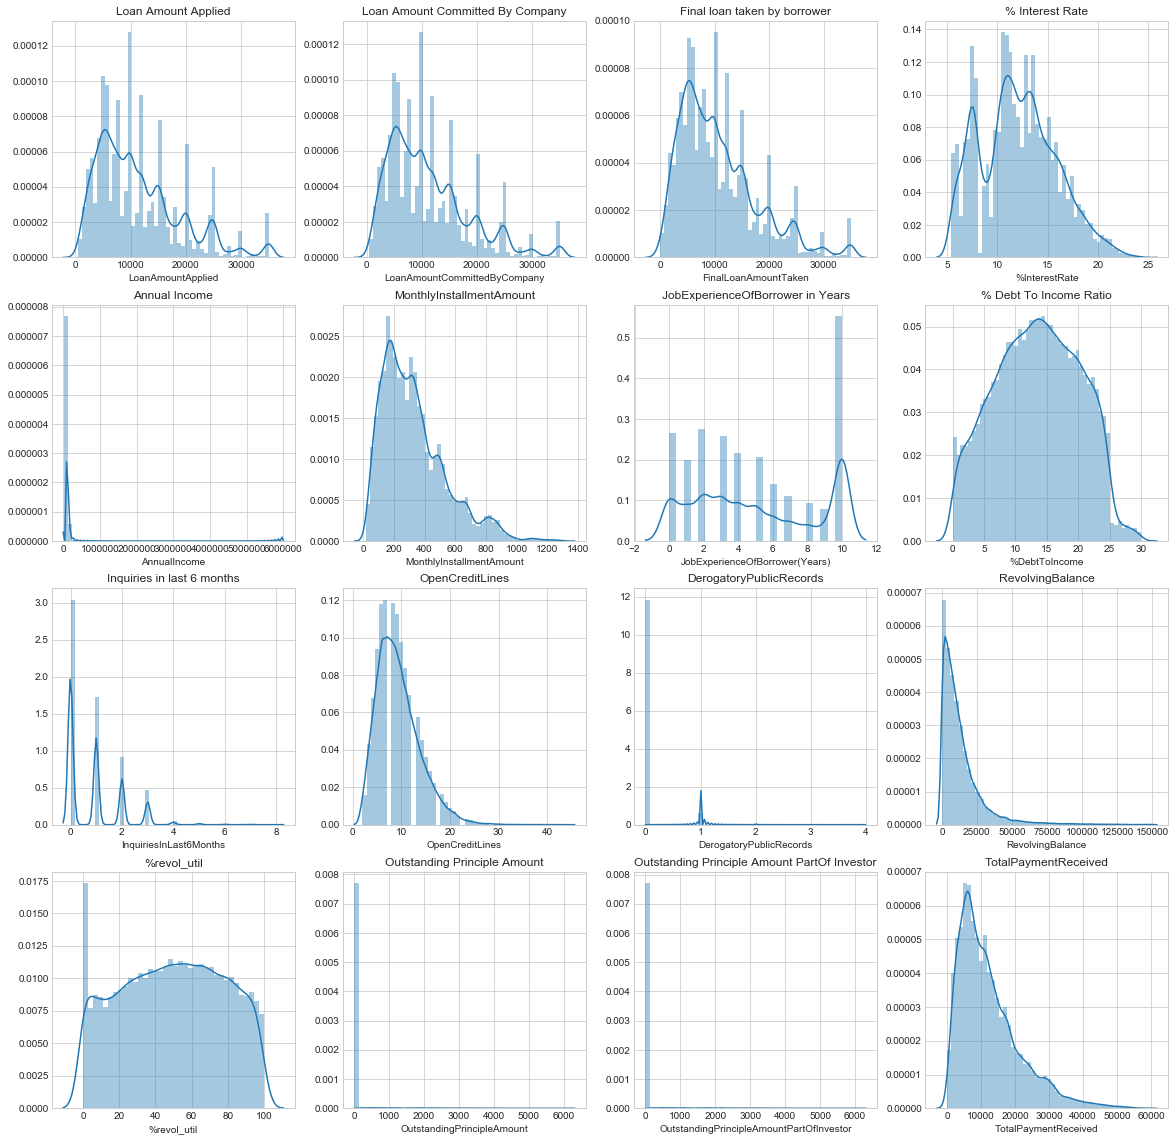

In [46]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.title('Loan Amount Applied')
sns.distplot(df['LoanAmountApplied'])

plt.subplot(4,4,2)
plt.title('Loan Amount Committed By Company')
sns.distplot(df['LoanAmountCommittedByCompany'])

plt.subplot(4,4,3)
plt.title('Final loan taken by borrower')
sns.distplot(df['FinalLoanAmountTaken'])

plt.subplot(4,4,4)
plt.title('% Interest Rate')
sns.distplot(df['%InterestRate'])

plt.subplot(4,4,5)
plt.title('Annual Income')
sns.distplot(df['AnnualIncome'])

plt.subplot(4,4,6)
plt.title('MonthlyInstallmentAmount')
sns.distplot(df['MonthlyInstallmentAmount'])

plt.subplot(4,4,7)
plt.title('JobExperienceOfBorrower in Years')
sns.distplot(df['JobExperienceOfBorrower(Years)'])


plt.subplot(4,4,8)
plt.title('% Debt To Income Ratio')
sns.distplot(df['%DebtToIncome'])

plt.subplot(4,4,9)
plt.title('Inquiries in last 6 months')
sns.distplot(df['InquiriesInLast6Months'])

plt.subplot(4,4,10)
plt.title('OpenCreditLines')
sns.distplot(df['OpenCreditLines'])

plt.subplot(4,4,11)
plt.title('DerogatoryPublicRecords')
sns.distplot(df['DerogatoryPublicRecords'])

plt.subplot(4,4,12)
plt.title('RevolvingBalance')
sns.distplot(df['RevolvingBalance'])

plt.subplot(4,4,13)
plt.title('%revol_util')
sns.distplot(df['%revol_util'])

plt.subplot(4,4,14)
plt.title('Outstanding Principle Amount')
sns.distplot(df['OutstandingPrincipleAmount'])

plt.subplot(4,4,15)
plt.title('Outstanding Principle Amount PartOf Investor')
sns.distplot(df['OutstandingPrincipleAmountPartOfInvestor'])

plt.subplot(4,4,16)
plt.title('TotalPaymentReceived')
sns.distplot(df['TotalPaymentReceived'])

plt.show()

### After plotting above distribution of all numeric attributes following inferences can be done for data:
   1. **Annual Income** is highly **Positivily Skewed** and seems there are outliers in it, hence we have to see its Central Tendency and remove outliers
   2. **OutstandingPrincipleAmount**, **OutstandingPrincipleAmountPartOfInvestor**, attributes tell that most of outstanding pricipal amount has been recovered and hence these columns will not help much in analysing the business goal that borrower is Defaulter or not

### 3.4 Removing Outliers from Annual Income Column
- We can see in following Central Tendency Analysis that max of Annual Income is too much high compared to mean & meadian value
- Also 75% of data is in the range of 10 to the 4 but maximum value is spanning in power of 6 that means there are outliers

In [47]:
df['AnnualIncome'].describe()

count    3.643300e+04
mean     6.930522e+04
std      6.354244e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: AnnualIncome, dtype: float64

In [48]:
df['AnnualIncome'].mean()
df['AnnualIncome'].std()
#& (df['AnnualIncome'] <= df['AnnualIncome'].mean()+2*df['AnnualIncome'].std()) 
df['AnnualIncome'].mean()+2*df['AnnualIncome'].std()
df['AnnualIncome'].mean() - 1*df['AnnualIncome'].std()
df = df[(df['AnnualIncome'] >= df['AnnualIncome'].mean() - 1*df['AnnualIncome'].std()) 
      & (df['AnnualIncome'] <= df['AnnualIncome'].mean()+df['AnnualIncome'].std())]

In [49]:
df['AnnualIncome'].describe()

count    34240.000000 
mean     60777.516749 
std      26372.935427 
min      6000.000000  
25%      40000.000000 
50%      56616.000000 
75%      77250.000000 
max      132750.000000
Name: AnnualIncome, dtype: float64

#### In removing outliers process we get rid of 11.8% of total rows which is acceptable, because we have still 34240 rows left with

In [50]:
print(len(df.index))
100*(1-len(df.index)/len(raw_df.index))

34240


13.790064707807737

### 3.5 Distribution after removing Outliers
We can see follwoing important analysis after removing Outliers from Annual Income field:
1. **Annual Income** column is ***no more*** Positivily Skewed
2. All other attributes also become normally distributed
3. Irrelevent columns like **OutstandingPrincipleAmount**, **OutstandingPrincipleAmountPartOfInvestor**, **JobExperienceOfBorrower(Years)**, **InquiriesInLast6Months**, **DerogatoryPublicRecords** have been removed from Distribution analysis

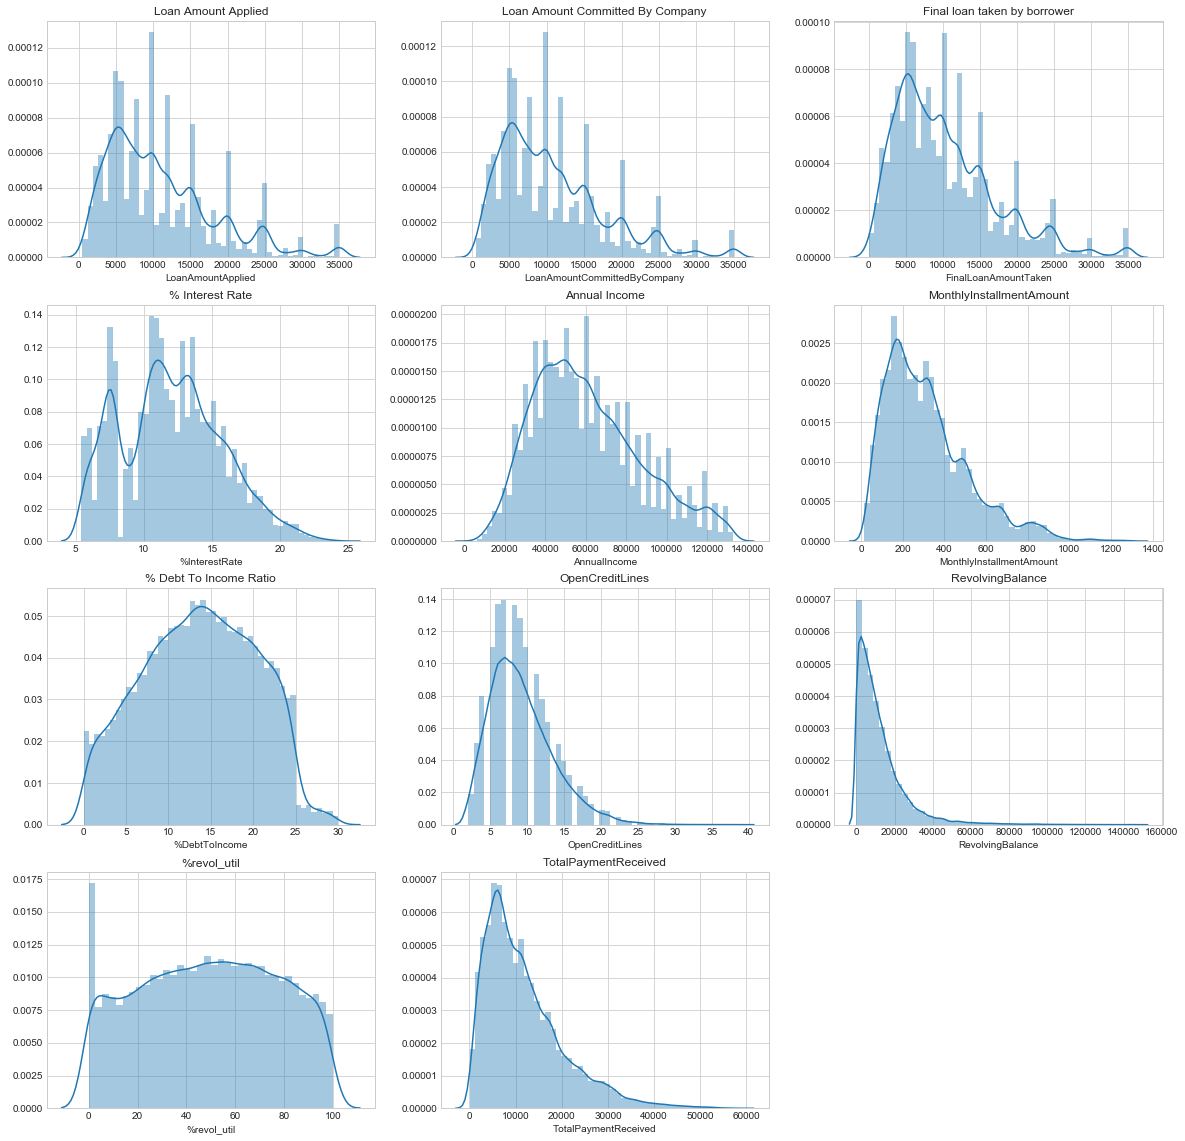

In [51]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
plt.title('Loan Amount Applied')
sns.distplot(df['LoanAmountApplied'])

plt.subplot(4,3,2)
plt.title('Loan Amount Committed By Company')
sns.distplot(df['LoanAmountCommittedByCompany'])

plt.subplot(4,3,3)
plt.title('Final loan taken by borrower')
sns.distplot(df['FinalLoanAmountTaken'])

plt.subplot(4,3,4)
plt.title('% Interest Rate')
sns.distplot(df['%InterestRate'])

plt.subplot(4,3,5)
plt.title('Annual Income')
sns.distplot(df['AnnualIncome'])

plt.subplot(4,3,6)
plt.title('MonthlyInstallmentAmount')
sns.distplot(df['MonthlyInstallmentAmount'])


plt.subplot(4,3,7)
plt.title('% Debt To Income Ratio')
sns.distplot(df['%DebtToIncome'])

plt.subplot(4,3,8)
plt.title('OpenCreditLines')
sns.distplot(df['OpenCreditLines'])

plt.subplot(4,3,9)
plt.title('RevolvingBalance')
sns.distplot(df['RevolvingBalance'])

plt.subplot(4,3,10)
plt.title('%revol_util')
sns.distplot(df['%revol_util'])

plt.subplot(4,3,11)
plt.title('TotalPaymentReceived')
sns.distplot(df['TotalPaymentReceived'])

plt.show()

#### 2.2 Univariate Analysis - Orderd Categorical Variables

# 3. Segmented Univariate Analysis

### More the loan amount allocated more risk of consumer being a Defaulter
Following box plot and aggregation analysis on the basis of 'FinalLoanAmountTaken' & grouped on loan_status column values. We found that tendency of consumer to be Defaulter increases when more amount is allocated as loan.

- For Charged Off(Defaulter) Borrowers, FinalLoanAmountTaken 
    - Mean : 10964.27
    - 3rd Quartile : 15000.00
- For Fully Paid Borrowers, FinalLoanAmountTaken
    - Mean : 9907.93
    - 3rd Quartile : 13350.00   

Which says that larger FinalLoanAmountTaken may cause borrower to be defaulter. ***The important point here can be said that too much of loan amount allocated to Borrower may end up in Consumer to become a Defaulter. Although it will depend on the other attributes as well for example %DebtToIncome attribute and %InterestRate etc.***

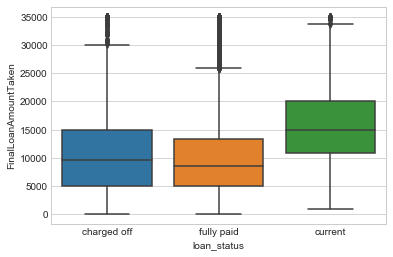

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
charged off,4720.0,10964.274798,7412.819321,0.0,5000.0,9600.000000,15000.0,35000.0
current,970.0,15786.427547,7764.415487,1000.0,10812.5,14975.000000,20000.0,35000.0
fully paid,28550.0,9907.932266,6514.132767,0.0,5000.0,8494.815287,13350.0,35000.0


In [52]:
sns.boxplot(x=df.loan_status, y=df['FinalLoanAmountTaken'])
plt.show()
df.groupby(by='loan_status')['FinalLoanAmountTaken'].describe()

### Higher the %DebtToIncome Ratio, Higher is the chance of Loan Default
Segmented the %DebtToIncome Ratio on the basis of loan_status as shown in below box plot and aggegate analysis:
- %For Charged Off(Defaulter) Borrowers, %DabtToIncome ratio 
    - Mean : 14.27%
    - 3rd Quartile : 19.54
- For Fully Paid Borrowers, %DabtToIncome ratio 
    - Mean : 13.48%
    - 3rd Quartile : 18.70    

Which says that larger %DebtToIncome Ratio may cause borrower to be defaulter but still it does not give full picture. It can be interpreted as follows as well : ***"Loan given to Borrowers who have large debt amount compared to their income, may end up in being Defaulter, because they have strethed too much."***

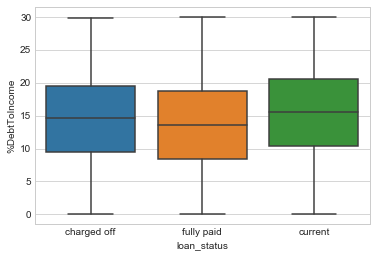

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
charged off,4720.0,14.274388,6.534656,0.0,9.500,14.60,19.540,29.85
current,970.0,15.179876,6.714388,0.0,10.355,15.49,20.485,29.95
fully paid,28550.0,13.478514,6.639302,0.0,8.400,13.60,18.700,29.99


In [53]:
sns.boxplot(x=df.loan_status, y=df['%DebtToIncome'])
plt.show()
df.groupby(by='loan_status')['%DebtToIncome'].describe()

### Higher the %InterestRate, Higher is the chance of Default
Segmented the %InterestRate on the basis of loan_status as shown in below box plot and aggegate analysis:
- %For Charged Off(Defaulter) Borrowers, %InterestRate 
    - Mean : 13.87%
    - 3rd Quartile : 16.40
- For Fully Paid Borrowers, %InterestRate 
    - Mean : 11.61%
    - 3rd Quartile : 13.99   

Which says that larger %InterestRate may cause borrower to be defaulter, or the same can be interpreted as ***"borrowers having loan of higher %interest rate may end up in being a Defaulter"***

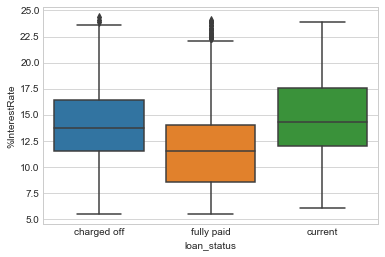

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
charged off,4720.0,13.866519,3.625928,5.42,11.48,13.67,16.40,24.40
current,970.0,14.926711,3.518501,6.00,11.99,14.27,17.58,23.91
fully paid,28550.0,11.609616,3.578114,5.42,8.49,11.49,13.99,24.11


In [54]:
sns.boxplot(x=df.loan_status, y=df['%InterestRate'])
plt.show()
df.groupby(by='loan_status')['%InterestRate'].describe()

### Lower the Annual Income, Higher is the chances of Default
Segmented the Annual Income on the basis of loan_status as shown in below box plot and aggegate analysis:
- %For Charged Off(Defaulter) Borrowers, Annual Income 
    - Mean : 56540
    - 3rd Quartile : 71031
- For Fully Paid Borrowers, Annual Income
    - Mean : 61313
    - 3rd Quartile : 78000   

Which says that larger Annual Income may cause borrower to be defaulter

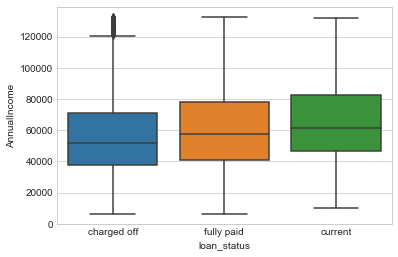

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
charged off,4720.0,56540.640415,25348.782314,6000.0,37753.2075,52000.0,71031.0,132725.38
current,970.0,65631.076144,25196.167690,10020.0,46505.2200,61700.0,82500.0,132000.00
fully paid,28550.0,61313.072044,26501.715788,6000.0,40896.0000,57500.0,78000.0,132750.00


In [55]:
sns.boxplot(x=df.loan_status, y=df.AnnualIncome)
plt.show()
df.groupby(by='loan_status')['AnnualIncome'].describe()

### Cannot see direct impact of Revolving Balance on borrower being a Defaulter or not

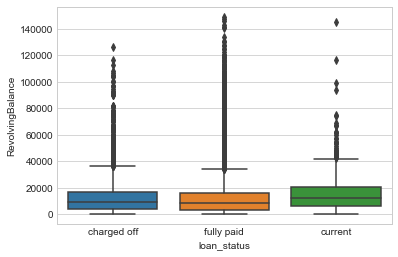

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
charged off,4720.0,12832.127754,13302.264323,0.0,4050.75,9252.0,17034.25,126302.0
current,970.0,15194.044330,13715.921322,0.0,5983.50,12256.0,20578.00,145384.0
fully paid,28550.0,12136.827706,13324.690876,0.0,3581.00,8500.0,15967.00,149000.0


In [56]:
sns.boxplot(x=df.loan_status, y=df.RevolvingBalance)
#plt.yscale('log')
plt.show()
df.groupby(by='loan_status')['RevolvingBalance'].describe()

#### TotalPaymentReceived, TotalPaymentReceivedPartOfInvestor, PrincipalReceivedTillDate, LateFeesReceivedTillDate and RecoveryConsumerChargedOff columns can be ignored because they are just final outcome columns which tells that Lending Company have finally got the full payment or not

# 4. Bivariate Analysis

### 4.1 Bivariate Analysis-Numeric Variables
- 'LoanAmountApplied','LoanAmountCommittedByCompany','FinalLoanAmountTaken' columns are highly correlated and it is obvious why they are correlated. Because they are telling that most of the time, the amount for which Borrower has applied for loan, the Lending Company committed that they can release the amount and finally the Borrower has taken also taken almost same amount of loan
- 'AnnualIncome' is -ve correlated to '%DebtToIncome', we can understand it because %DebtToIncome is inversely proportional to Income
- **AnnualIncome and Moderately +ve correlated to 'RevolvingBalance' & 'FinalLoanAmountTaken'**
- **'%DebtToIncome' is Moderately +ve correlated to 'RevolvingBalance'**
- **'%InterestRate' is Moderately +ve correlated to 'FinalLoanAmountTaken'**

In [57]:
pair_cols = df[['LoanAmountApplied','LoanAmountCommittedByCompany','FinalLoanAmountTaken',
                '%DebtToIncome', '%InterestRate', 'AnnualIncome','RevolvingBalance']]

In [58]:
cor_matrix = pair_cols.corr()
round(cor_matrix,3)

,LoanAmountApplied,LoanAmountCommittedByCompany,FinalLoanAmountTaken,%DebtToIncome,%InterestRate,AnnualIncome,RevolvingBalance
LoanAmountApplied,1.000,0.982,0.953,0.098,0.295,0.393,0.323
LoanAmountCommittedByCompany,0.982,1.000,0.972,0.098,0.301,0.388,0.316
FinalLoanAmountTaken,0.953,0.972,1.000,0.101,0.293,0.375,0.299
%DebtToIncome,0.098,0.098,0.101,1.000,0.113,-0.074,0.276
%InterestRate,0.295,0.301,0.293,0.113,1.000,0.049,0.087
AnnualIncome,0.393,0.388,0.375,-0.074,0.049,1.000,0.392
RevolvingBalance,0.323,0.316,0.299,0.276,0.087,0.392,1.000


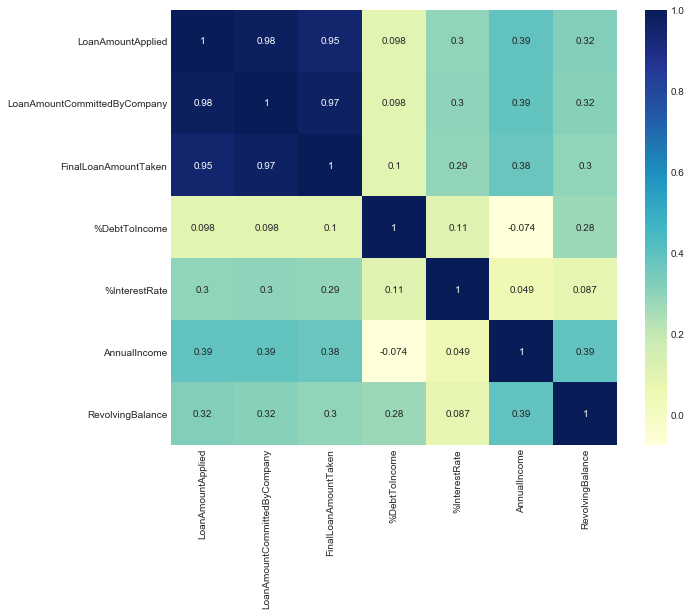

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix,cmap='YlGnBu',annot=True)
plt.show()

### 4.2 Bivariate Analysis-Categorical Variables

### loan_status and NumberOfPayments(Months)
This analysis has given very important results:
1. For 36 months of Term if %Interest Rate is around 10.84 then there are more chances that Borrower will repay whole amount but if for 36 months term %InterestRate is around 12.39 then chances is that Borrower will be Defaulter. So for **36 months Term** company should **lend the money at interest rate of 10.84% to increase its Profit and reduce the loss**
2. In the same way, we can analyse that for **60 months of Term** Company should **lend the money at interest rate of 14.36% to increase its Profit and reduce the loss**
3. %DebtToIncome should be equal to or less than 13.22% for 36 months of Term because if it is 13.89% then chances is more that Consumer will be Defaulter. For 60 months term it should be 14.41%

### For companies profit & to avoid Defaulters
- 36 months Term
    - Max Limit of %DebtToIncome = 13.22%
    - Max Interest Rate = 10.84%
- 60 months Term
    - Max Limit of %DebtToIncome = 14.41%
    - Max Interest Rate = 14.36%

In [60]:
df.groupby(by=['loan_status','NumberOfPayments(Months)'])['FinalLoanAmountTaken','AnnualIncome','%InterestRate','%DebtToIncome','RevolvingBalance'].mean().round(2)

FinalLoanAmountTaken  AnnualIncome  \
loan_status NumberOfPayments(Months)                                       
charged off  36                       8202.50               53462.14       
             60                       14398.12              60368.29       
current      60                       15786.43              65631.08       
fully paid   36                       8801.59               60157.12       
             60                       13860.23              65442.58       

                                      %InterestRate  %DebtToIncome  \
loan_status NumberOfPayments(Months)                                 
charged off  36                       12.39          13.89           
             60                       15.70          14.75           
current      60                       14.93          15.18           
fully paid   36                       10.84          13.22           
             60                       14.36          14.41           

                                      RevolvingBalance  
loan_status NumberOfPayments(Months)                    
charged off  36                       11812.97          
             60                       14099.30          
current      60                       15194.04          
fully paid   36                       11656.33          
             60                       13853.35

'garde' and 'sub_grade' does not give much significant resuts on Defaulter

In [61]:
df.groupby(by=['loan_status','grade'])['FinalLoanAmountTaken','AnnualIncome','%InterestRate','%DebtToIncome','RevolvingBalance'].mean().round(2)

FinalLoanAmountTaken  AnnualIncome  %InterestRate  \
loan_status grade                                                      
charged off A      7511.60               50821.07      7.62            
            B      9872.72               53860.59      11.17           
            C      10008.11              55637.78      13.68           
            D      11105.71              57274.99      15.95           
            E      14115.26              60697.22      17.88           
            F      17371.57              67587.19      20.07           
            G      16522.29              69441.05      21.48           
current     A      10624.55              59361.53      8.40            
            B      16139.09              64774.06      11.49           
            C      15775.75              66782.89      14.15           
            D      14538.14              63178.78      17.02           
            E      16092.67              64635.55      18.87           
            F      19730.18              77556.96      21.12           
            G      20429.23              80243.14      22.84           
fully paid  A      8139.40               61212.09      7.32            
            B      10006.47              60545.32      11.01           
            C      9680.61               59894.84      13.57           
            D      11074.75              61306.40      15.65           
            E      13701.81              66162.64      17.54           
            F      15897.49              71095.19      19.48           
            G      19038.11              77300.45      21.13           

                   %DebtToIncome  RevolvingBalance  
loan_status grade                                   
charged off A      13.49          12089.06          
            B      14.07          11671.75          
            C      14.75          13197.02          
            D      14.25          12306.69          
            E      14.45          14405.18          
            F      14.46          15745.27          
            G      13.87          14681.77          
current     A      13.35          10409.03          
            B      15.48          16043.81          
            C      15.19          15890.64          
            D      15.13          14121.46          
            E      15.55          13680.49          
            F      14.04          17145.58          
            G      14.13          20908.64          
fully paid  A      12.31          10605.63          
            B      13.65          12450.09          
            C      14.05          12351.13          
            D      14.22          12901.77          
            E      14.32          14295.27          
            F      14.79          15091.13          
            G      14.32          17093.49

### loan_status & JobExperienceOfBorrower(Years) 
- For any number of years of Job Experience, the Borrower is not a Defaulter if %Interest Rate is in the range of 11.50% to 11.74% but if the the interest rate is high from 13.61% to 14.06% then the Borrower could be defaulter.

**Hence for Company's Benifit, for any Job Experience Level, the interest Rate should be in the Range of 11.50% to 11.74%**

In [62]:
df.groupby(by=['loan_status','JobExperienceOfBorrower(Years)'])['FinalLoanAmountTaken','AnnualIncome','%InterestRate','%DebtToIncome','RevolvingBalance'].mean().round(2)

FinalLoanAmountTaken  \
loan_status JobExperienceOfBorrower(Years)                         
charged off 0                               9167.86                
            1                               8958.47                
            2                               9397.44                
            3                               10330.21               
            4                               10236.78               
            5                               11235.13               
            6                               11217.60               
            7                               11467.66               
            8                               11830.91               
            9                               11496.40               
            10                              13190.30               
current     0                               13392.30               
            1                               13730.54               
            2                               14897.53               
            3                               14621.59               
            4                               15235.71               
            5                               16288.64               
            6                               14569.79               
            7                               14948.78               
            8                               14629.36               
            9                               14483.52               
            10                              17756.29               
fully paid  0                               8499.31                
            1                               8886.23                
            2                               9012.17                
            3                               9491.82                
            4                               9866.09                
            5                               10043.00               
            6                               10230.62               
            7                               10446.84               
            8                               10396.05               
            9                               10820.91               
            10                              11281.42               

                                            AnnualIncome  %InterestRate  \
loan_status JobExperienceOfBorrower(Years)                                
charged off 0                               48616.17      13.61           
            1                               51697.94      13.67           
            2                               49554.93      13.74           
            3                               53793.06      13.96           
            4                               55305.56      13.86           
            5                               58329.18      13.80           
            6                               58921.76      13.98           
            7                               56453.62      14.00           
            8                               60627.46      13.70           
            9                               59253.87      13.86           
            10                              64197.26      14.06           
current     0                               61864.39      15.75           
            1                               62618.94      14.70           
            2                               64418.90      15.25           
            3                               58269.71      14.94           
            4                               61129.99      15.21           
            5                               64681.87      14.47           
            6                               62851.04      15.64           
            7                               59782.68      14.40           
            8                               59358.90      14.83           
            9

### loan_status & HomeOwnershipStatusOfBorrower

Irrespective whether the Borrower stays in own house or rented house the %Interest Rate should not exceed from the range of 11.26% to 11.93%. 

In [63]:
df.groupby(by=['loan_status','HomeOwnershipStatusOfBorrower'])['FinalLoanAmountTaken','AnnualIncome','%InterestRate','%DebtToIncome','RevolvingBalance'].mean().round(2)

FinalLoanAmountTaken  AnnualIncome  \
loan_status HomeOwnershipStatusOfBorrower                                       
charged off MORTGAGE                       12586.04              66364.34       
            OTHER                          8954.72               55870.29       
            OWN                            10629.05              50601.60       
            RENT                           9756.13               49685.36       
current     MORTGAGE                       16929.50              72747.72       
            OWN                            14201.65              53193.46       
            RENT                           14464.59              57835.66       
fully paid  MORTGAGE                       10941.68              71025.11       
            OTHER                          6949.93               60965.59       
            OWN                            9247.90               52754.81       
            RENT                           9117.64               54094.30       

                                           %InterestRate  %DebtToIncome  \
loan_status HomeOwnershipStatusOfBorrower                                 
charged off MORTGAGE                       13.79          14.50           
            OTHER                          13.29          13.51           
            OWN                            13.96          14.42           
            RENT                           13.92          14.09           
current     MORTGAGE                       14.47          15.35           
            OWN                            14.91          15.04           
            RENT                           15.57          14.97           
fully paid  MORTGAGE                       11.26          13.30           
            OTHER                          11.82          11.13           
            OWN                            11.51          13.52           
            RENT                           11.93          13.64           

                                           RevolvingBalance  
loan_status HomeOwnershipStatusOfBorrower                    
charged off MORTGAGE                       16406.18          
            OTHER                          13981.47          
            OWN                            11610.06          
            RENT                           10198.00          
current     MORTGAGE                       17824.22          
            OWN                            10795.97          
            RENT                           12279.46          
fully paid  MORTGAGE                       15165.11          
            OTHER                          10835.69          
            OWN                            10607.56          
            RENT                           9725.66

In [64]:
df.groupby(by=['loan_status','NumberOfPayments(Months)','HomeOwnershipStatusOfBorrower'])['FinalLoanAmountTaken','AnnualIncome','%InterestRate','%DebtToIncome','RevolvingBalance'].mean().round(2)

FinalLoanAmountTaken  \
loan_status NumberOfPayments(Months) HomeOwnershipStatusOfBorrower                         
charged off  36                      MORTGAGE                       9084.08                
                                     OTHER                          8797.20                
                                     OWN                            8065.57                
                                     RENT                           7659.26                
             60                      MORTGAGE                       15913.26               
                                     OTHER                          11475.00               
                                     OWN                            13547.23               
                                     RENT                           12995.14               
current      60                      MORTGAGE                       16929.50               
                                     OWN                            14201.65               
                                     RENT                           14464.59               
fully paid   36                      MORTGAGE                       9481.03                
                                     OTHER                          6949.93                
                                     OWN                            8347.03                
                                     RENT                           8349.74                
             60                      MORTGAGE                       14918.48               
                                     OWN                            12797.41               
                                     RENT                           12648.26               

                                                                    AnnualIncome  \
loan_status NumberOfPayments(Months) HomeOwnershipStatusOfBorrower                 
charged off  36                      MORTGAGE                       64299.36       
                                     OTHER                          57362.19       
                                     OWN                            46899.20       
                                     RENT                           47415.27       
             60                      MORTGAGE                       68326.28       
                                     OTHER                          32000.00       
                                     OWN                            54816.28       
                                     RENT                           53191.97       
current      60                      MORTGAGE                       72747.72       
                                     OWN                            53193.46       
                                     RENT                           57835.66       
fully paid   36                      MORTGAGE                       70328.15       
                                     OTHER                          60965.59       
                                     OWN                            51315.55       
                                     RENT                           53507.13       
             60                      MORTGAGE                       72922.69       
                                     OWN                            58425.55       
                                     RENT                           56793.97       

                                                                    %InterestRate  \
loan_status NumberOfPayments(Months) HomeOwnershipStatusOfBorrower                  
charged off  36                      MORTGAGE                       12.18           
                                     OTHER                          13.09           
                                     OWN                            12.28           
                                     RENT                           12.54           
             60                     

# 4. Conclusion

From all the above analysis(mainly Categorical Bivariate Analysis) we found that there are three main attributes  which in combination can decide whether Borrower can be a Defaulter or not:

***NumberOfPayments(Months), %Interest Rate & %DebtToIncome Ratio(or in other way loan applied for and Annual Income)***


***High Level Analysis Result***
- Higher the %Interest Rate goes more, chances of Borrower being a Defaulter will increase 
- Higher the %DebtToIncome Ratio, chances of Borrower being a Defaulter will increase 
- Lower the Annual Income, chances of Borrower being a Defaulter will increase

***Final Conclusion*** 

If the Lending Company want to have less chances that Borrower will be a Defaulter and in tern reduce their Credit Loss, they have to limit % DebtToIncome ratio and %Interest Rate as follows:

In Terms of Number Of Payments by Month:
- ***36 months Term***
    - %DebtToIncome Ratio <= 13.22%
    - %Interest Rate <= 10.84%
- ***60 months Term***
    - %DebtToIncome Ratio  <= 14.41%
    - %Interest Rate <= 14.36%

By above limitations, chances of having Safe Consumer increases and hence Credit Loss will be reduced.

    
**Higher the %Interest Rate goes more chances of getting loss because chances of Brrower being a Defaulter will increase.**


**Higher the %DebtToIncome Ratio goes more chances of getting loss because chances of Brrower being a Defaulter will increase.**
